# Libraries

In [1]:
%%capture

!pip install numpy
!pip install pybamm
!pip install scikit-learn
!pip install fastsim

In [17]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import glob
import os
import math
#import fastsim
#import pybamm

# EDA

### Concatenar bases de de dados

In [18]:
path = "Chevrolet_Malibu_Eco_2013_Data"

# Lista todos os arquivos .txt
txt_list = glob.glob(os.path.join(path, "*.txt"))

dfs = []

#### Adiconando coluna Test_id

In [19]:
for txt in txt_list:
    # Extrai TEST ID
    test_id = int(os.path.basename(txt).split()[0])
    
    # Lê o arquivo .txt
    df = pd.read_csv(txt, sep="\t")
    
    # Adiciona coluna "Test_id"
    df["Test_id"] = test_id
    
    dfs.append(df)

In [20]:
# Concatena tudo
df = pd.concat(dfs, ignore_index=True)

In [21]:
# Coloca "Test_id" como a primeira coluna e ordena para começar no primeiro "Test_id"
columns = ["Test_id"] + [col for col in df.columns if col != "Test_id"]
df = df[columns]

df = df.sort_values(by="Test_id").reset_index(drop=True)

In [22]:
df.head(5)

Test_id  Time[sec]  Dyno_Speed[mph]  Dyno_Tractive_Effort[N]  \
0  61302058       76.7           25.710                  492.986   
1  61302058       76.8           25.749                  350.723   
2  61302058       76.9           25.750                  247.848   
3  61302058       77.0           25.751                  230.652   
4  61302058       77.1           25.751                  220.270   

   Test_Cell_RH[%]  Test_Cell_Temp[C]  Phase_#  Engine_Oil_Temp[C]  \
0           43.621             22.041      1.0              27.594   
1           43.621             22.043      1.0              27.588   
2           43.622             22.045      1.0              27.604   
3           43.621             22.044      1.0              27.590   
4           43.621             22.043      1.0              27.612   

   Engine_Coolant_Temp[C]  Engine_Speed[rpm]  HV_Battery_Current[A]  \
0                    42.0            1286.50                 -0.116   
1                    42.0            1279.75                  3.196   
2                    42.0            1280.50                  4.645   
3                    42.0            1287.50                  4.981   
4                    42.0            1278.50                  4.976   

   HV_Battery_Voltage[V]  Fuel_Flow_FuelScale[cc/s]  
0                109.393                      1.218  
1                109.121                      1.218  
2                109.004                      1.218  
3                108.975                      1.218  
4                108.976                      1.218

### Verificando normalização e valores nulos

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214505 entries, 0 to 214504
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Test_id                    214505 non-null  int64  
 1   Time[sec]                  214505 non-null  float64
 2   Dyno_Speed[mph]            214505 non-null  float64
 3   Dyno_Tractive_Effort[N]    214505 non-null  float64
 4   Test_Cell_RH[%]            214505 non-null  float64
 5   Test_Cell_Temp[C]          214505 non-null  float64
 6   Phase_#                    214505 non-null  float64
 7   Engine_Oil_Temp[C]         214505 non-null  float64
 8   Engine_Coolant_Temp[C]     214505 non-null  float64
 9   Engine_Speed[rpm]          214505 non-null  float64
 10  HV_Battery_Current[A]      214505 non-null  float64
 11  HV_Battery_Voltage[V]      214505 non-null  float64
 12  Fuel_Flow_FuelScale[cc/s]  214505 non-null  float64
dtypes: float64(12), int64(1)
memo

In [24]:
df.isnull().sum()

Test_id                      0
Time[sec]                    0
Dyno_Speed[mph]              0
Dyno_Tractive_Effort[N]      0
Test_Cell_RH[%]              0
Test_Cell_Temp[C]            0
Phase_#                      0
Engine_Oil_Temp[C]           0
Engine_Coolant_Temp[C]       0
Engine_Speed[rpm]            0
HV_Battery_Current[A]        0
HV_Battery_Voltage[V]        0
Fuel_Flow_FuelScale[cc/s]    0
dtype: int64

In [ ]:
print("Total de valores nulos:", df.isnull().sum().sum())

Total de valores nulos: 0


### Verificando amostragem dos testes

In [26]:
df.shape

(214505, 13)

In [27]:
df["Test_id"].value_counts().sort_index()

Test_id
61302058    13841
61302059    13841
61302060    13841
61302061    15551
61302062    13001
61302071    13841
61302072    13841
61302075    15551
61302076    13001
61302078    18121
61302095    13841
61302096    13841
61302097    13841
61302099    15551
61302100    13001
Name: count, dtype: int64

In [28]:
df.describe().T


count          mean          std           min  \
Test_id                    214505.0  6.130208e+07    15.378469  6.130206e+07   
Time[sec]                  214505.0  7.110371e+02   424.151777 -1.000000e+01   
Dyno_Speed[mph]            214505.0  2.967312e+01    21.852619 -4.210000e-01   
Dyno_Tractive_Effort[N]    214505.0  1.372983e+02  1143.516587 -5.843537e+03   
Test_Cell_RH[%]            214505.0  3.131006e+01    11.540625  1.210000e+01   
Test_Cell_Temp[C]          214505.0  1.849742e+01    18.058994 -8.286000e+00   
Phase_#                    214505.0  1.680567e+00     0.829131  0.000000e+00   
Engine_Oil_Temp[C]         214505.0  8.181981e+01    16.815599 -5.888000e+00   
Engine_Coolant_Temp[C]     214505.0  8.199098e+01    10.257631 -6.000000e+00   
Engine_Speed[rpm]          214505.0  1.299313e+03   617.292489  0.000000e+00   
HV_Battery_Current[A]      214505.0 -3.479549e-01    22.109268 -1.283700e+02   
HV_Battery_Voltage[V]      214505.0  1.082578e+02    17.133584  0.000000e+00   
Fuel_Flow_FuelScale[cc/s]  214505.0  9.892795e-01     1.048156  0.000000e+00   

                                    25%           50%           75%  \
Test_id                    6.130206e+07  6.130208e+07  6.130210e+07   
Time[sec]                  3.475000e+02  7.050000e+02  1.062500e+03   
Dyno_Speed[mph]            1.064300e+01  2.683300e+01  4.905200e+01   
Dyno_Tractive_Effort[N]   -3.603000e+00  1.131560e+02  4.920990e+02   
Test_Cell_RH[%]            1.974500e+01  3.183900e+01  4.165800e+01   
Test_Cell_Temp[C]         -5.169000e+00  2.333200e+01  3.544300e+01   
Phase_#                    1.000000e+00  2.000000e+00  2.000000e+00   
Engine_Oil_Temp[C]         8.132100e+01  8.680800e+01  9.091300e+01   
Engine_Coolant_Temp[C]     8.300000e+01  8.400000e+01  8.600000e+01   
Engine_Speed[rpm]          1.194000e+03  1.406250e+03  1.589500e+03   
HV_Battery_Current[A]     -5.491000e+00  4.094000e+00  4.890000e+00   
HV_Battery_Voltage[V]      1.094860e+02  1.107470e+02  1.124470e+02   
Fuel_Flow_FuelScale[cc/s]  2.410000e-01  7.740000e-01  1.369000e+00   

                                    max  
Test_id                    6.130210e+07  
Time[sec]                  1.802000e+03  
Dyno_Speed[mph]            8.084700e+01  
Dyno_Tractive_Effort[N]    6.669397e+03  
Test_Cell_RH[%]            5.530300e+01  
Test_Cell_Temp[C]          4.065200e+01  
Phase_#                    4.000000e+00  
Engine_Oil_Temp[C]         1.005130e+02  
Engine_Coolant_Temp[C]     9.500000e+01  
Engine_Speed[rpm]          6.003000e+03  
HV_Battery_Current[A]      1.689800e+02  
HV_Battery_Voltage[V]      1.297240e+02  
Fuel_Flow_FuelScale[cc/s]  1.205200e+01

#### Criação de novas colunas

In [29]:
# Converter mph para km/h
df['Dyno_Speed[kmh]'] = df['Dyno_Speed[mph]'] * 1.60934

In [30]:
# Potência da Bateria

df["HV_Battery_Power[W]"] = df["HV_Battery_Current[A]"] * df["HV_Battery_Voltage[V]"]

df["HV_Battery_Power[kW]"] = df["HV_Battery_Power[W]"] / 1000

#### Salvando DF

In [32]:
df.drop(['Dyno_Speed[mph]', 'HV_Battery_Power[W]'], axis=1, inplace=True)

In [33]:
df.head()

Test_id  Time[sec]  Dyno_Tractive_Effort[N]  Test_Cell_RH[%]  \
0  61302058       76.7                  492.986           43.621   
1  61302058       76.8                  350.723           43.621   
2  61302058       76.9                  247.848           43.622   
3  61302058       77.0                  230.652           43.621   
4  61302058       77.1                  220.270           43.621   

   Test_Cell_Temp[C]  Phase_#  Engine_Oil_Temp[C]  Engine_Coolant_Temp[C]  \
0             22.041      1.0              27.594                    42.0   
1             22.043      1.0              27.588                    42.0   
2             22.045      1.0              27.604                    42.0   
3             22.044      1.0              27.590                    42.0   
4             22.043      1.0              27.612                    42.0   

   Engine_Speed[rpm]  HV_Battery_Current[A]  HV_Battery_Voltage[V]  \
0            1286.50                 -0.116                109.393   
1            1279.75                  3.196                109.121   
2            1280.50                  4.645                109.004   
3            1287.50                  4.981                108.975   
4            1278.50                  4.976                108.976   

   Fuel_Flow_FuelScale[cc/s]  Dyno_Speed[kmh]  HV_Battery_Power[kW]  
0                      1.218        41.376131             -0.012690  
1                      1.218        41.438896              0.348751  
2                      1.218        41.440505              0.506324  
3                      1.218        41.442114              0.542804  
4                      1.218        41.442114              0.542265

In [35]:
df.to_csv("malibu_complete_data.csv", index=False)

### Verificando colunas

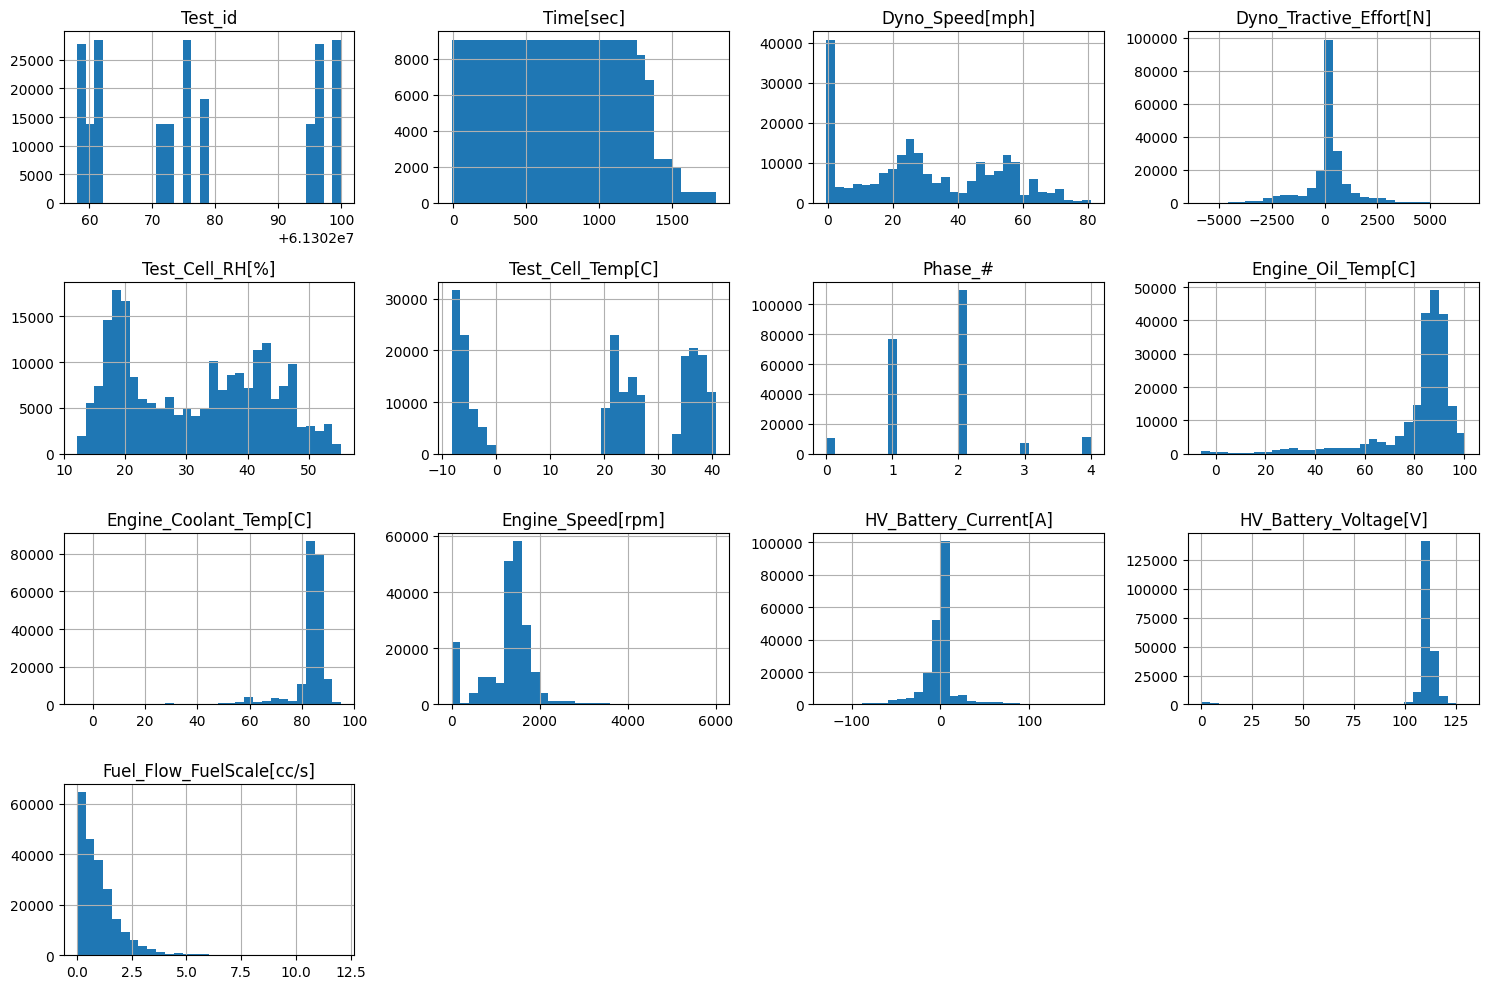

In [14]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [15]:
df["Phase_#"].nunique()

5

In [16]:
df["Phase_#"].value_counts().sort_index()

Phase_#
0.0     10455
1.0     76590
2.0    109460
3.0      7020
4.0     10980
Name: count, dtype: int64

In [17]:
fases_por_teste = (
    df.groupby("Test_id")["Phase_#"]
    .agg(Qtd_Fases=lambda x: x.nunique(),
         Fases_Lista=lambda x: sorted(x.unique()))
    .reset_index()
)

print(fases_por_teste)


     Test_id  Qtd_Fases                Fases_Lista
0   61302058          3            [0.0, 1.0, 2.0]
1   61302059          3            [0.0, 1.0, 2.0]
2   61302060          3            [0.0, 1.0, 2.0]
3   61302061          3            [0.0, 1.0, 2.0]
4   61302062          5  [0.0, 1.0, 2.0, 3.0, 4.0]
5   61302071          3            [0.0, 1.0, 2.0]
6   61302072          3            [0.0, 1.0, 2.0]
7   61302075          3            [0.0, 1.0, 2.0]
8   61302076          5  [0.0, 1.0, 2.0, 3.0, 4.0]
9   61302078          3            [0.0, 1.0, 2.0]
10  61302095          3            [0.0, 1.0, 2.0]
11  61302096          3            [0.0, 1.0, 2.0]
12  61302097          3            [0.0, 1.0, 2.0]
13  61302099          3            [0.0, 1.0, 2.0]
14  61302100          5  [0.0, 1.0, 2.0, 3.0, 4.0]


In [18]:
fase_info = df.groupby(["Test_id", "Phase_#"]).agg({
    "Time[sec]": lambda x: x.max() - x.min(),
    "Dyno_Speed[mph]": "mean"
})
fase_info

Time[sec]  Dyno_Speed[mph]
Test_id  Phase_#                            
61302058 0.0            0.0         0.003000
         1.0          514.9        25.125722
         2.0          868.9        16.039456
61302059 0.0            0.0         0.003000
         1.0          514.9        25.141350
         2.0          868.9        16.069967
61302060 0.0            0.0         0.001000
         1.0          514.9        25.063262
         2.0          868.9        16.004420
61302061 0.0         1555.0         0.000641
         1.0          764.9        48.287893
         2.0          764.9        48.285580
61302062 0.0         1300.0         0.000086
         1.0          598.9        27.491736
         2.0          365.9        61.413174
         3.0          599.9        27.464173
         4.0          365.9        61.421983
61302071 0.0         1384.0         0.002252
         1.0          503.9        25.633706
         2.0          868.9        16.010715
61302072 0.0         1384.0         0.000811
         1.0          503.9        25.665654
         2.0          868.9        16.020357
61302075 0.0         1555.0         0.002347
         1.0          764.9        48.348829
         2.0          764.9        48.349513
61302076 0.0         1300.0         0.001744
         1.0          598.9        27.540661
         2.0          365.9        61.466397
         3.0          599.9        27.477294
         4.0          365.9        61.476918
61302078 0.0         1812.0         0.001655
         1.0          599.9        21.589816
         2.0          600.9        21.572008
61302095 0.0         1384.0         0.002982
         1.0          503.9        25.719384
         2.0          868.9        15.945634
61302096 0.0         1384.0         0.002757
         1.0          503.9        25.826930
         2.0          868.9        16.124527
61302097 0.0         1384.0         0.000748
         1.0          503.9        25.870584
         2.0          868.9        16.163470
61302099 0.0         1555.0         0.000904
         1.0          764.9        48.376762
         2.0          764.9        48.389476
61302100 0.0         1300.0         0.000360
         1.0          598.9        27.626770
         2.0          365.9        61.463748
         3.0          599.9        27.463858
         4.0          365.9        61.425885

In [19]:
# Analisar o comportamento da corrente (pico, min)
print("Estatísticas da Corrente da Bateria (HV_Battery_Current[A]):")
print(df['HV_Battery_Current[A]'].describe())

Estatísticas da Corrente da Bateria (HV_Battery_Current[A]):
count    214505.000000
mean         -0.347955
std          22.109268
min        -128.370000
25%          -5.491000
50%           4.094000
75%           4.890000
max         168.980000
Name: HV_Battery_Current[A], dtype: float64


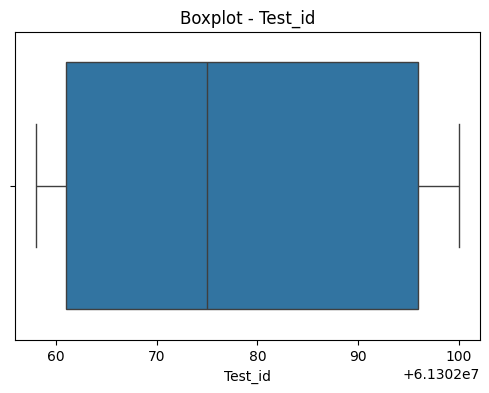

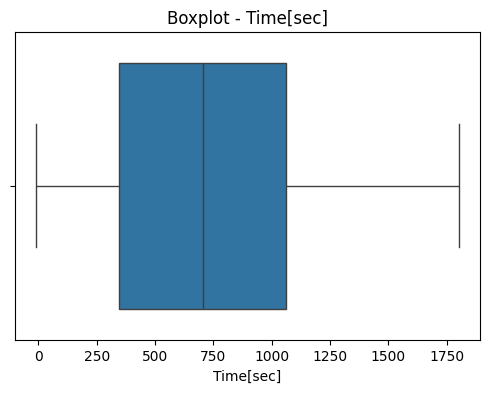

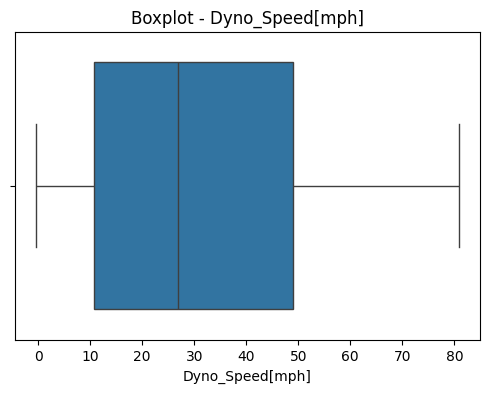

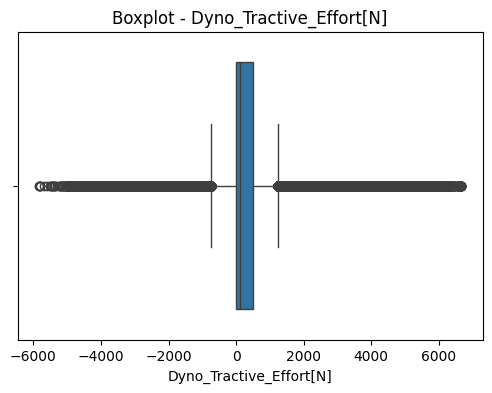

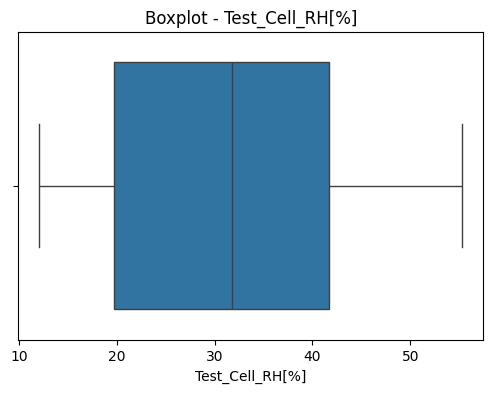

KeyboardInterrupt: 

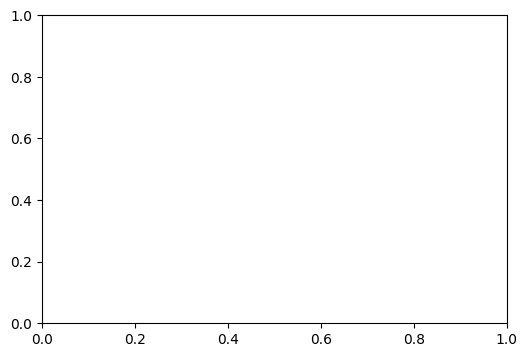

In [20]:
# Gera um boxplot para cada  coluna
for col in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    if not outliers.empty:
        print(f"Coluna {col} tem {len(outliers)} outliers")


Coluna Dyno_Tractive_Effort[N] tem 45609 outliers
Coluna Phase_# tem 10980 outliers
Coluna Engine_Oil_Temp[C] tem 27480 outliers
Coluna Engine_Coolant_Temp[C] tem 26056 outliers
Coluna Engine_Speed[rpm] tem 33923 outliers
Coluna HV_Battery_Current[A] tem 34063 outliers
Coluna HV_Battery_Voltage[V] tem 17445 outliers
Coluna Fuel_Flow_FuelScale[cc/s] tem 8821 outliers


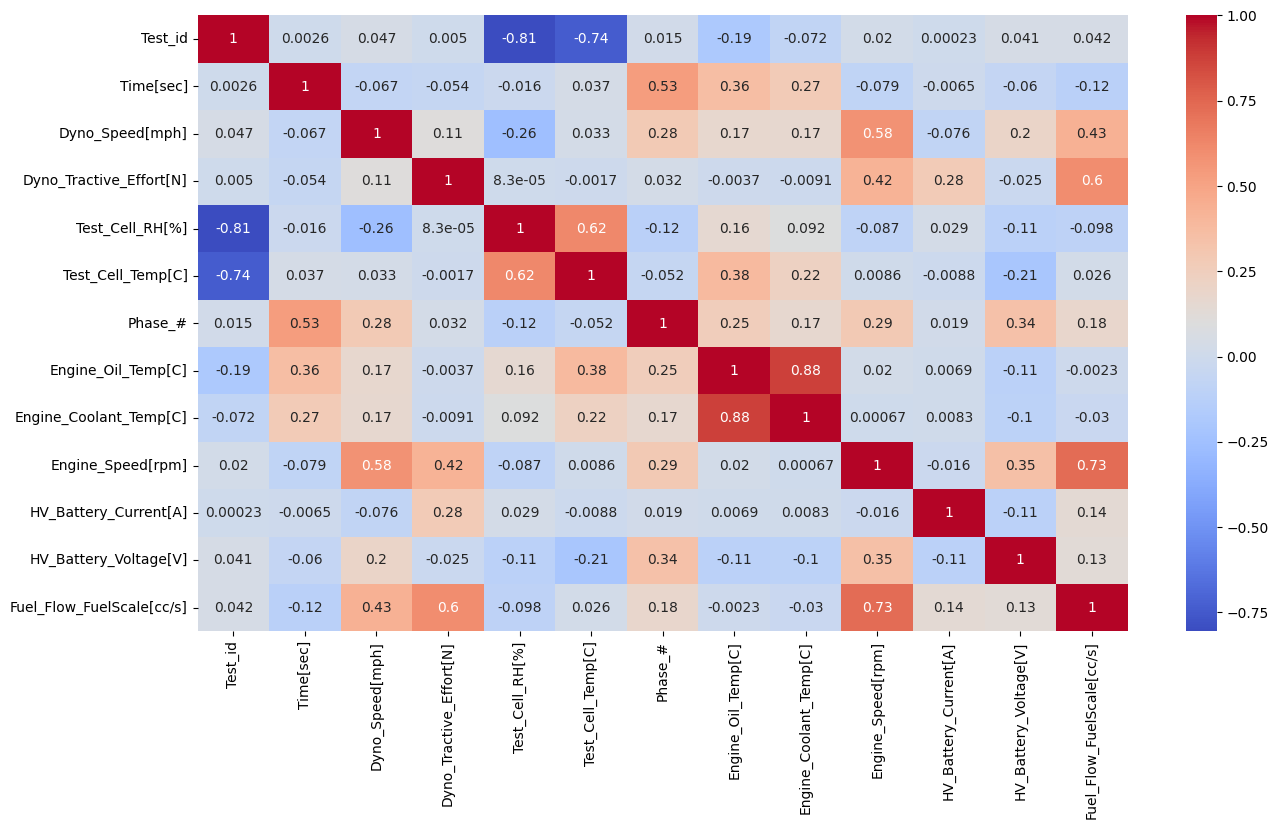

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


<Axes: xlabel='Test_id', ylabel='Engine_Speed[rpm]'>

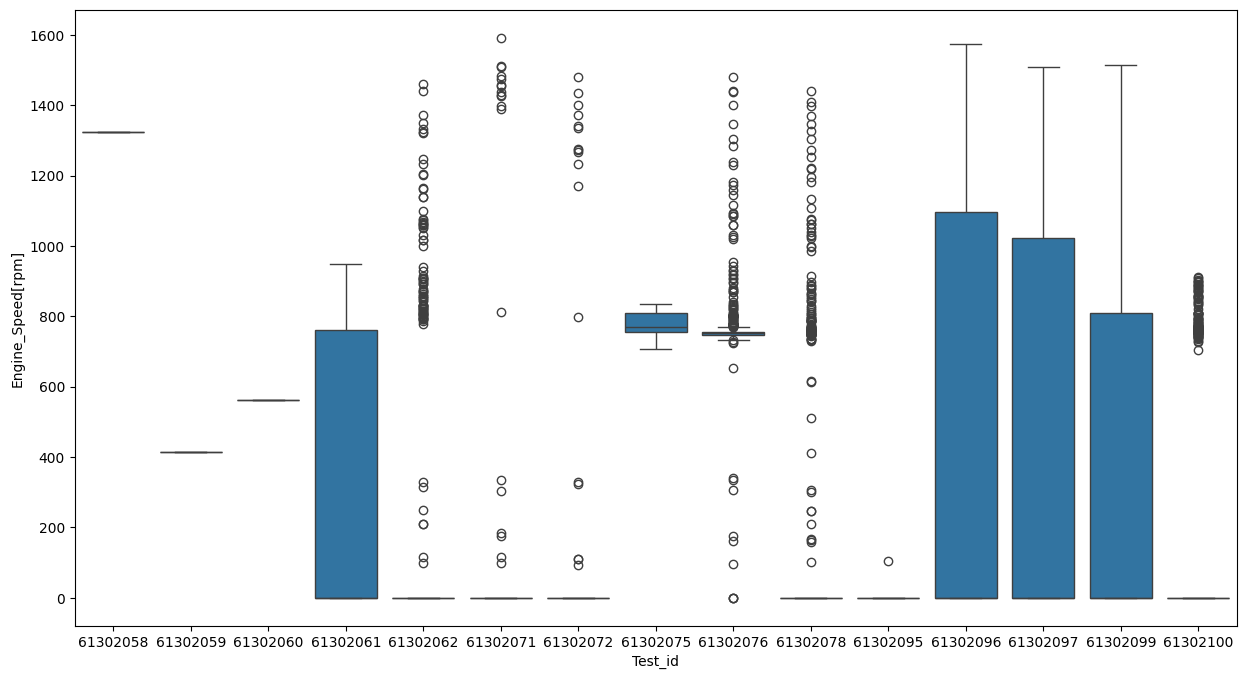

In [ ]:
fase1 = df[df["Phase_#"] == 0.0]
plt.figure(figsize=(15,8))
sns.boxplot(data=fase1, x="Test_id", y="Engine_Speed[rpm]")

<Axes: xlabel='Test_id', ylabel='Engine_Speed[rpm]'>

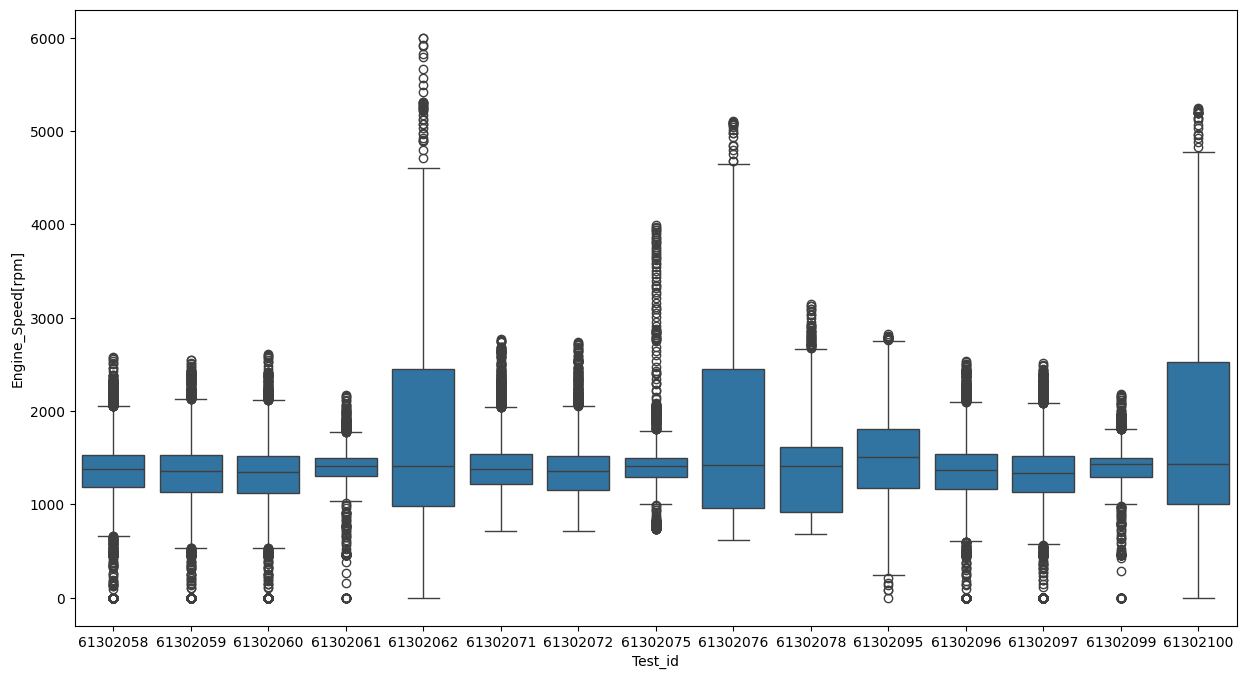

In [ ]:
fase1 = df[df["Phase_#"] == 1.0]
plt.figure(figsize=(15,8))
sns.boxplot(data=fase1, x="Test_id", y="Engine_Speed[rpm]")


<Axes: xlabel='Test_id', ylabel='Engine_Speed[rpm]'>

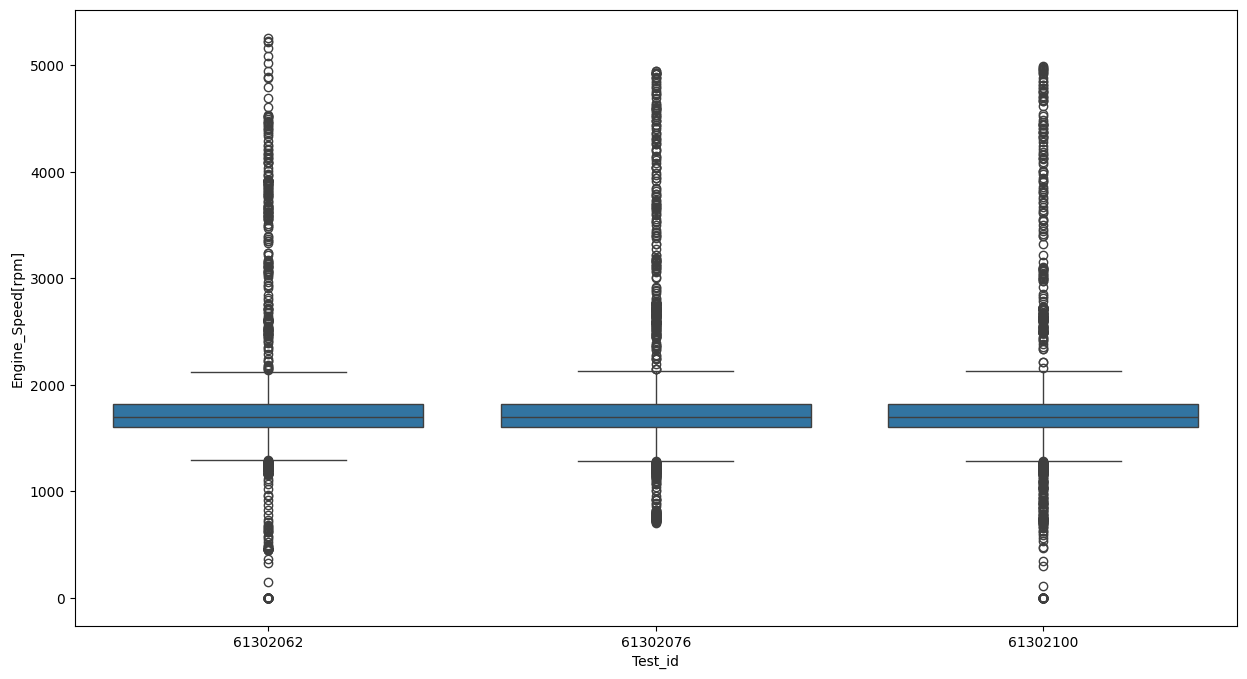

In [ ]:
fase1 = df[df["Phase_#"] == 4.0]
plt.figure(figsize=(15,8))
sns.boxplot(data=fase1, x="Test_id", y="Engine_Speed[rpm]")

In [ ]:
## TESTE

df["Mudanca_Fase"] = df["Phase_#"].diff().ne(0)
transicoes = df[df["Mudanca_Fase"]]

df.head(25)

Test_id  Time[sec]  Dyno_Speed[mph]  Dyno_Tractive_Effort[N]  \
0   61302058       76.7           25.710                  492.986   
1   61302058       76.8           25.749                  350.723   
2   61302058       76.9           25.750                  247.848   
3   61302058       77.0           25.751                  230.652   
4   61302058       77.1           25.751                  220.270   
5   61302058       77.2           25.760                  217.436   
6   61302058       77.3           25.795                  200.737   
7   61302058       77.4           25.797                  195.027   
8   61302058       75.9           25.320                  356.606   
9   61302058       76.0           25.392                  436.639   
10  61302058       76.1           25.417                  448.254   
11  61302058       76.2           25.491                  461.751   
12  61302058       76.3           25.542                  471.918   
13  61302058       76.4           25.588                  460.583   
14  61302058       76.5           25.648                  472.567   
15  61302058       76.6           25.699                  502.784   
16  61302058       75.1           25.166                   81.186   
17  61302058       75.2           25.166                   91.266   
18  61302058       75.3           25.175                  128.254   
19  61302058       75.4           25.210                  138.723   
20  61302058       75.5           25.211                  155.076   
21  61302058       75.6           25.214                  166.150   
22  61302058       75.7           25.249                  189.122   
23  61302058       75.8           25.273                  251.093   
24  61302058       74.3           25.326                 -301.460   

    Test_Cell_RH[%]  Test_Cell_Temp[C]  Phase_#  Engine_Oil_Temp[C]  \
0            43.621             22.041      1.0              27.594   
1            43.621             22.043      1.0              27.588   
2            43.622             22.045      1.0              27.604   
3            43.621             22.044      1.0              27.590   
4            43.621             22.043      1.0              27.612   
5            43.621             22.044      1.0              27.619   
6            43.621             22.043      1.0              27.598   
7            43.621             22.043      1.0              27.621   
8            43.621             22.036      1.0              27.564   
9            43.622             22.038      1.0              27.564   
10           43.622             22.039      1.0              27.564   
11           43.621             22.039      1.0              27.570   
12           43.620             22.039      1.0              27.578   
13           43.621             22.039      1.0              27.574   
14           43.621             22.039      1.0              27.564   
15           43.621             22.039      1.0              27.583   
16           43.621             22.034      1.0              27.540   
17           43.621             22.035      1.0              27.524   
18           43.621             22.035      1.0              27.522   
19           43.620             22.035      1.0              27.542   
20           43.620             22.034      1.0              27.539   
21           43.621             22.036      1.0              27.523   
22           43.621             22.035      1.0              27.538   
23           43.622             22.035      1.0              27.548   
24           43.613             22.029      1.0              27.484   

    Engine_Coolant_Temp[C]  Engine_Speed[rpm]  HV_Battery_Current[A]  \
0                     42.0            1286.50                 -0.116   
1                     42.0            1279.75                  3.196   
2                     42.0            1280.50                  4.645   
3                     42.0            1287.50                  4.981   
4  

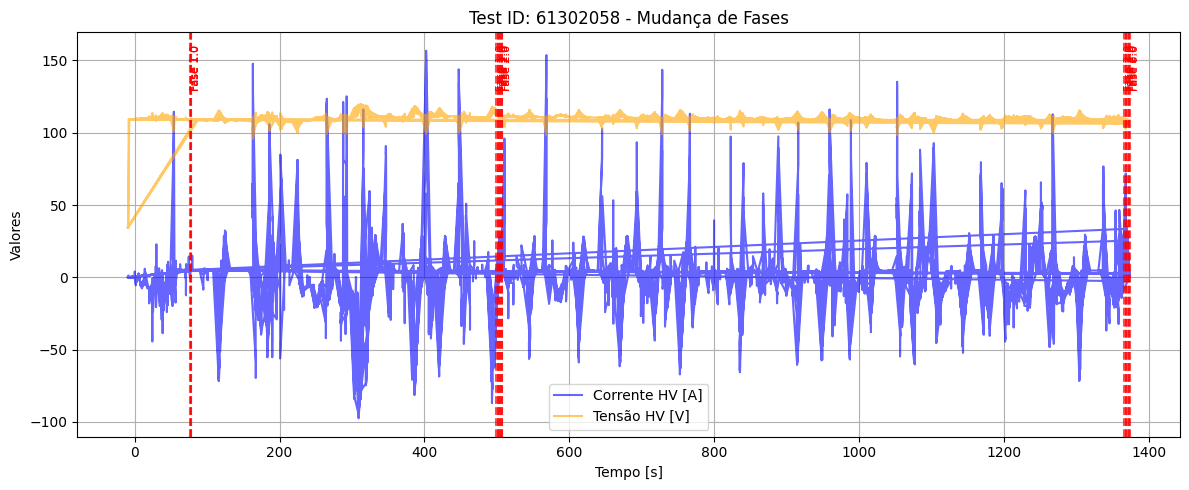

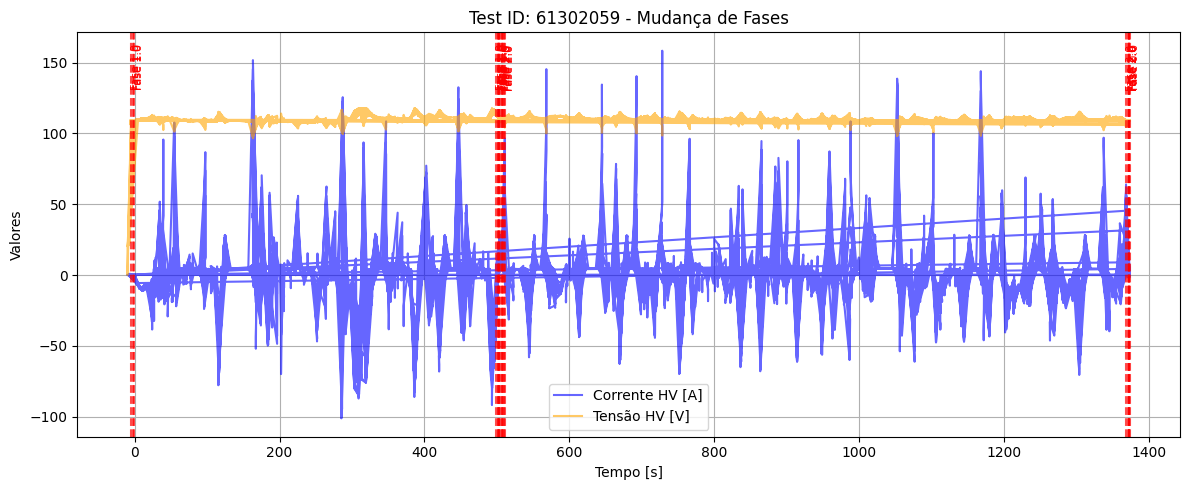

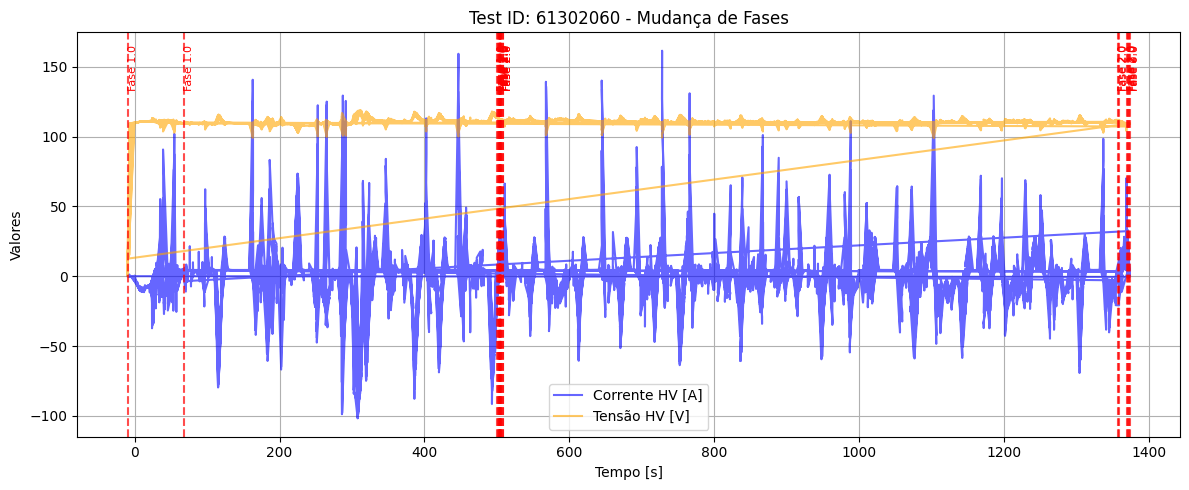

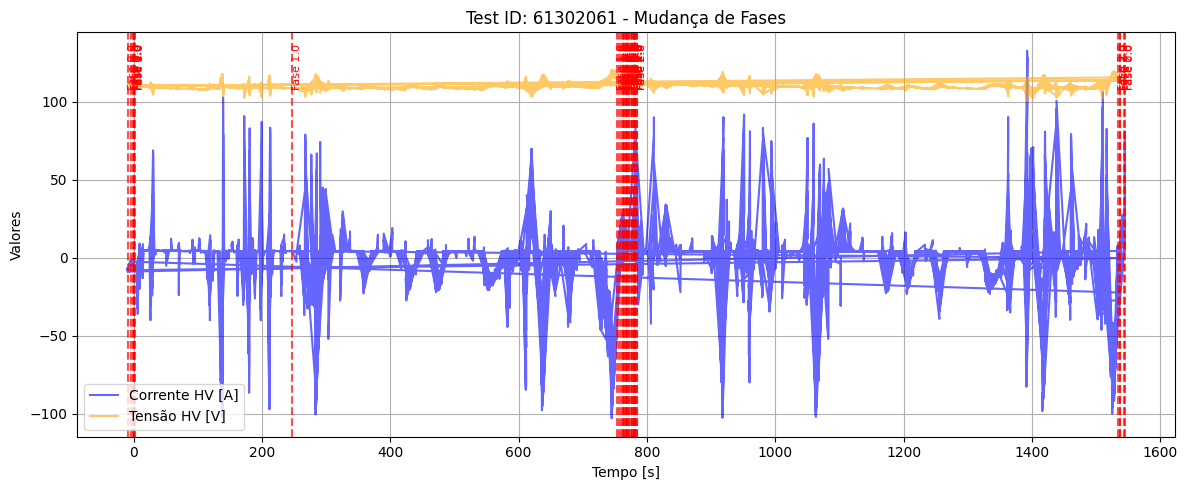

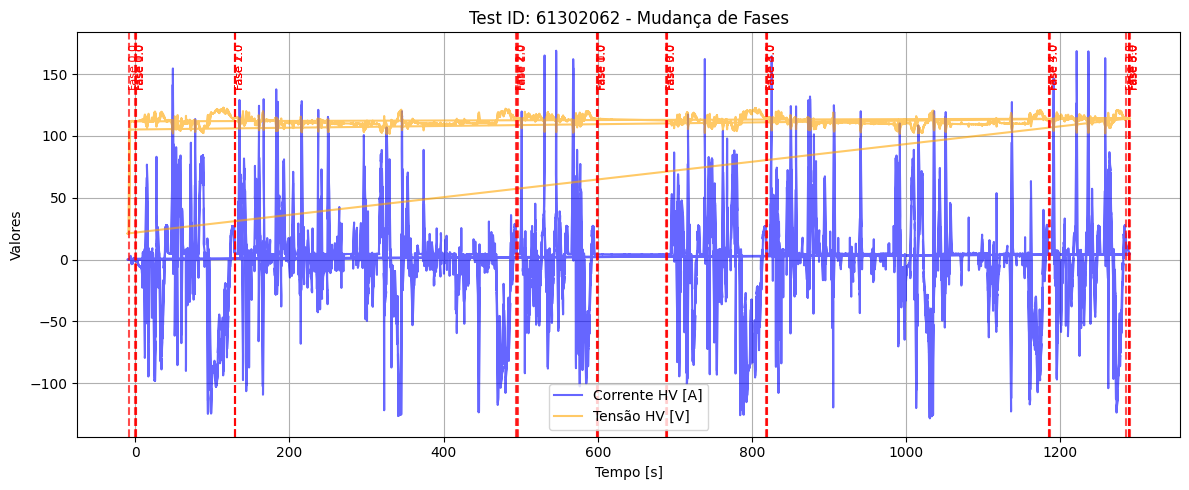

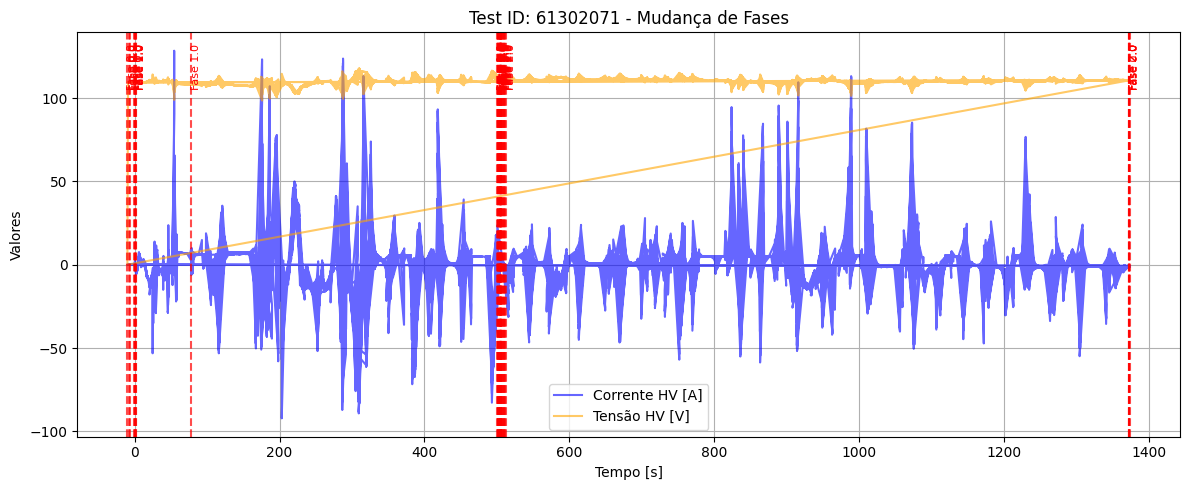

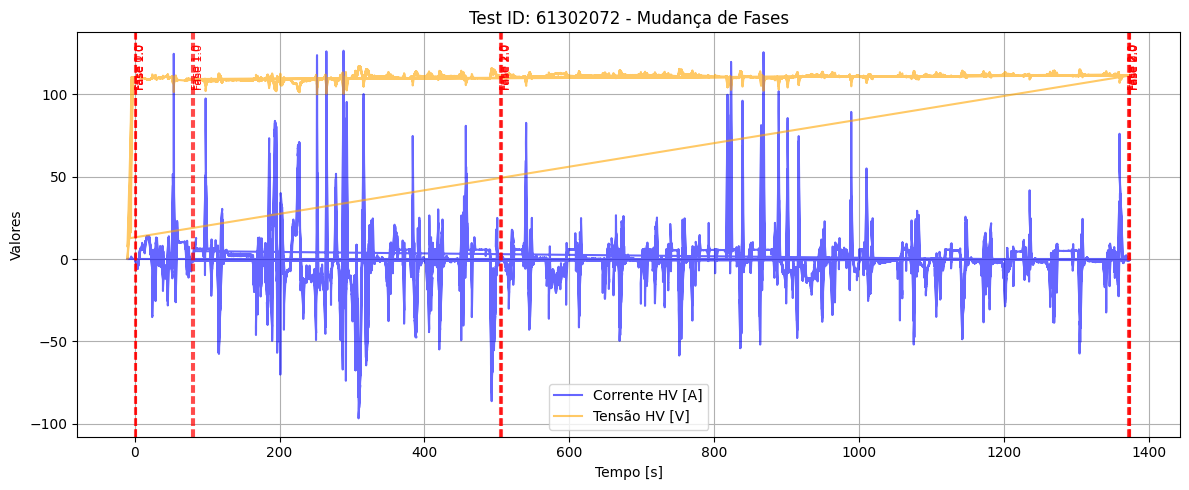

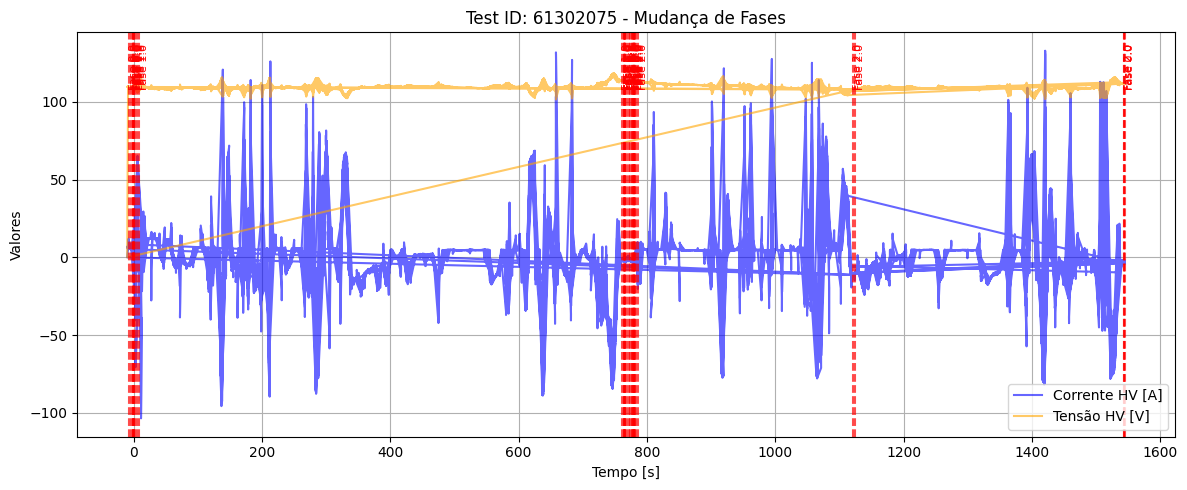

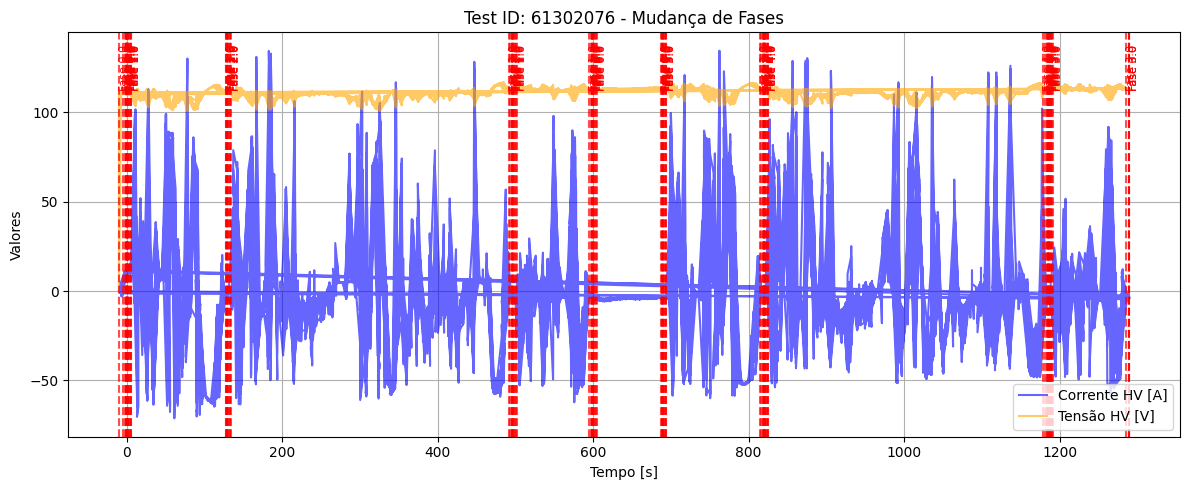

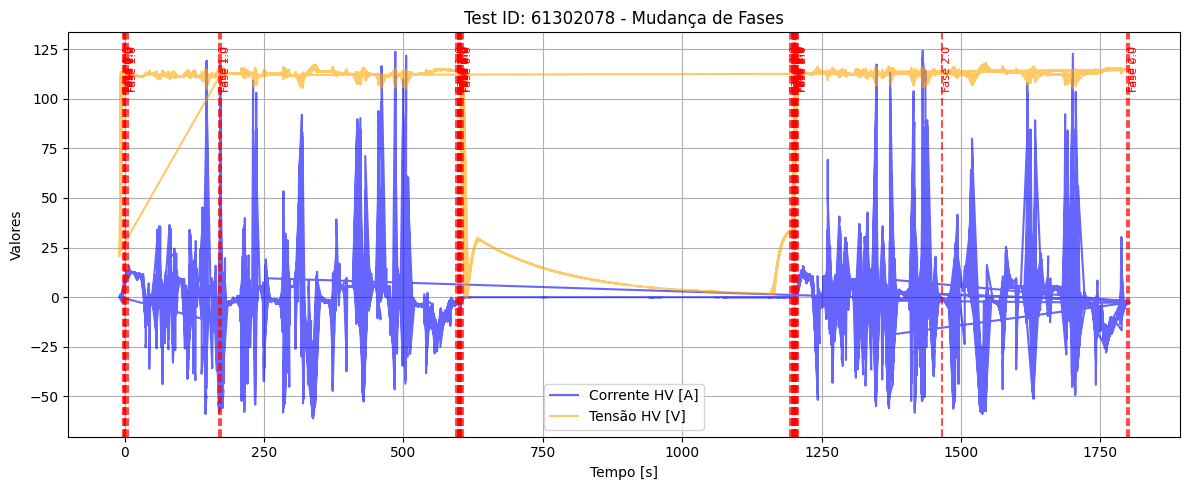

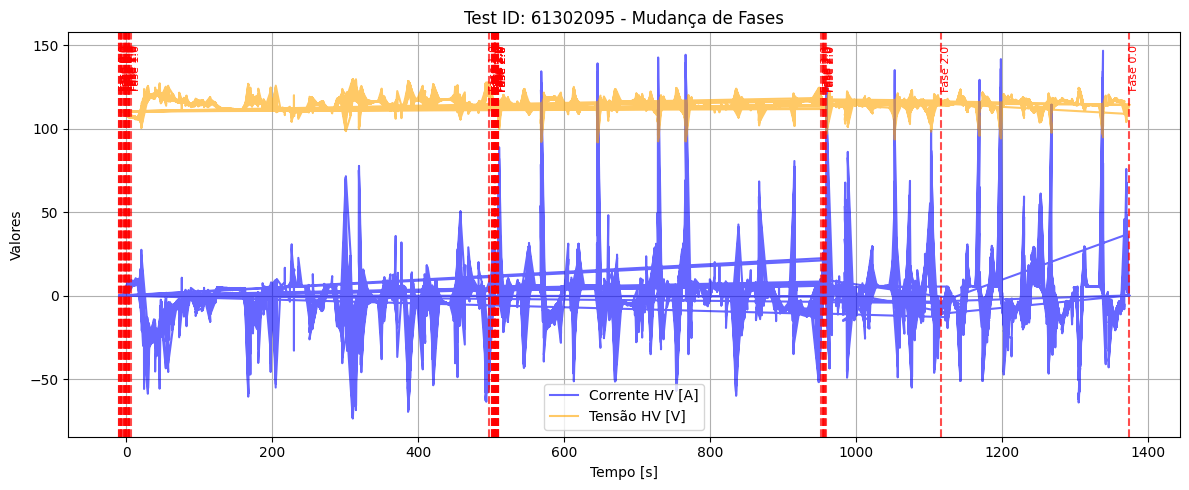

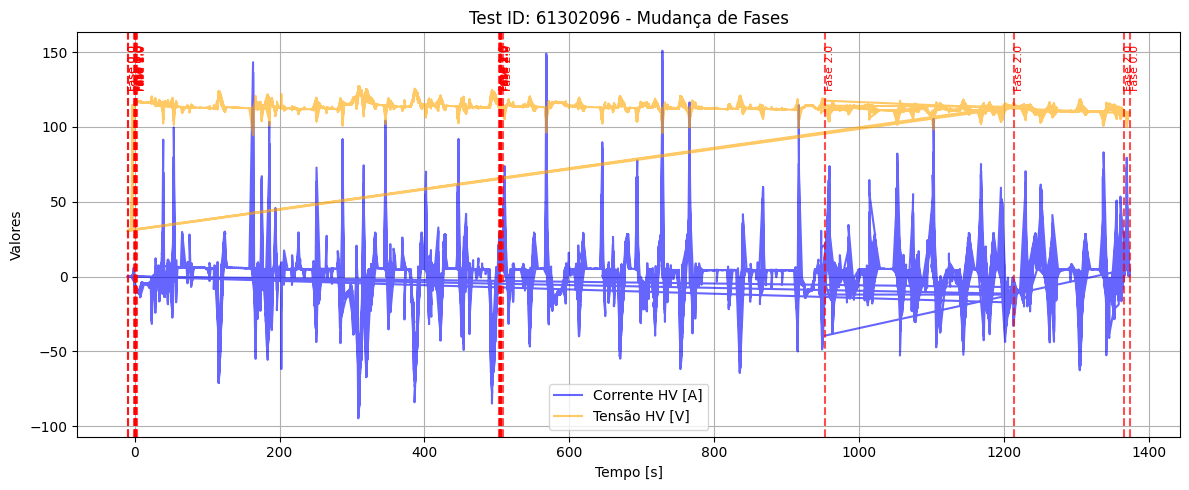

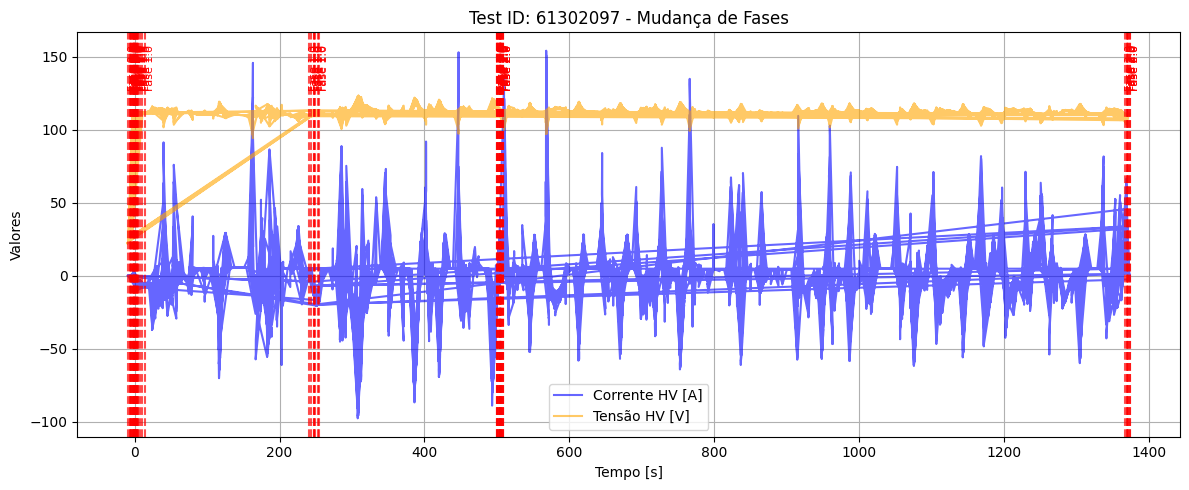

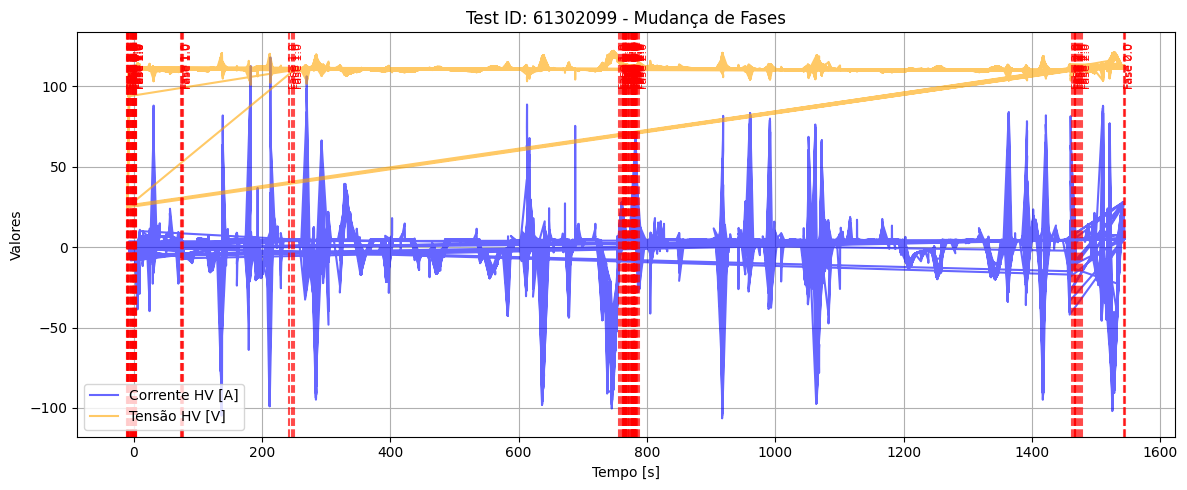

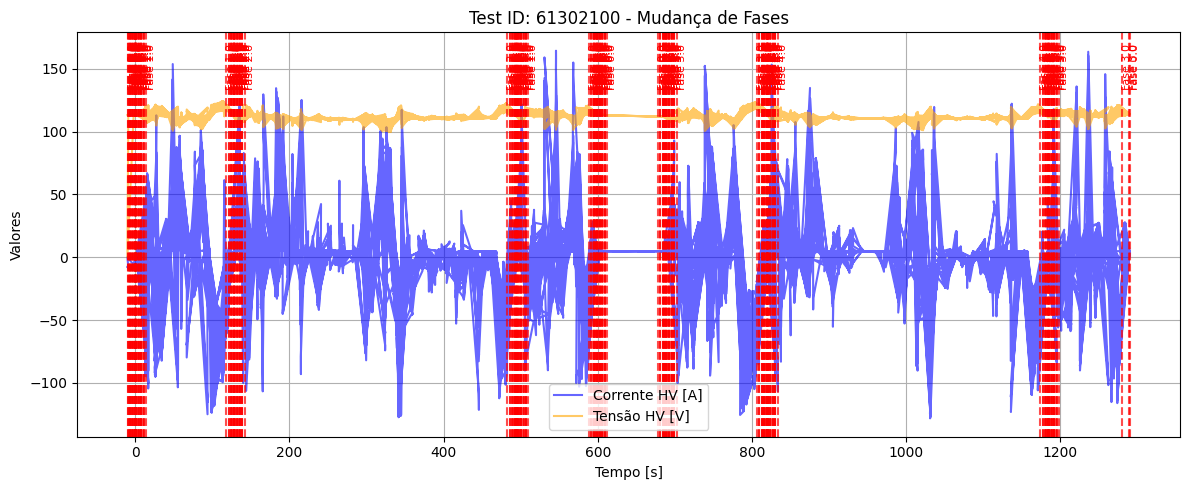

In [ ]:
# Iterar sobre cada Test ID
for test_id, dados in df.groupby("Test_id"):
    plt.figure(figsize=(12, 5))
    
    # Plotar variável de interesse
    plt.plot(dados["Time[sec]"], dados["HV_Battery_Current[A]"], label="Corrente HV [A]", color="blue", alpha=0.6)
    plt.plot(dados["Time[sec]"], dados["HV_Battery_Voltage[V]"], label="Tensão HV [V]", color="orange", alpha=0.6)
    
    # Detectar transições de fase
    dados["Mudanca_Fase"] = dados["Phase_#"].diff().ne(0)
    pontos_transicao = dados[dados["Mudanca_Fase"]]
    
    # Adicionar linhas verticais nas mudanças de fase
    for tempo, fase in zip(pontos_transicao["Time[sec]"], pontos_transicao["Phase_#"]):
        plt.axvline(x=tempo, color="red", linestyle="--", alpha=0.7)
        plt.text(tempo, plt.ylim()[1]*0.95, f"Fase {fase}", color="red", fontsize=8, rotation=90, va="top")
    
    plt.title(f"Test ID: {test_id} - Mudança de Fases")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Valores")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


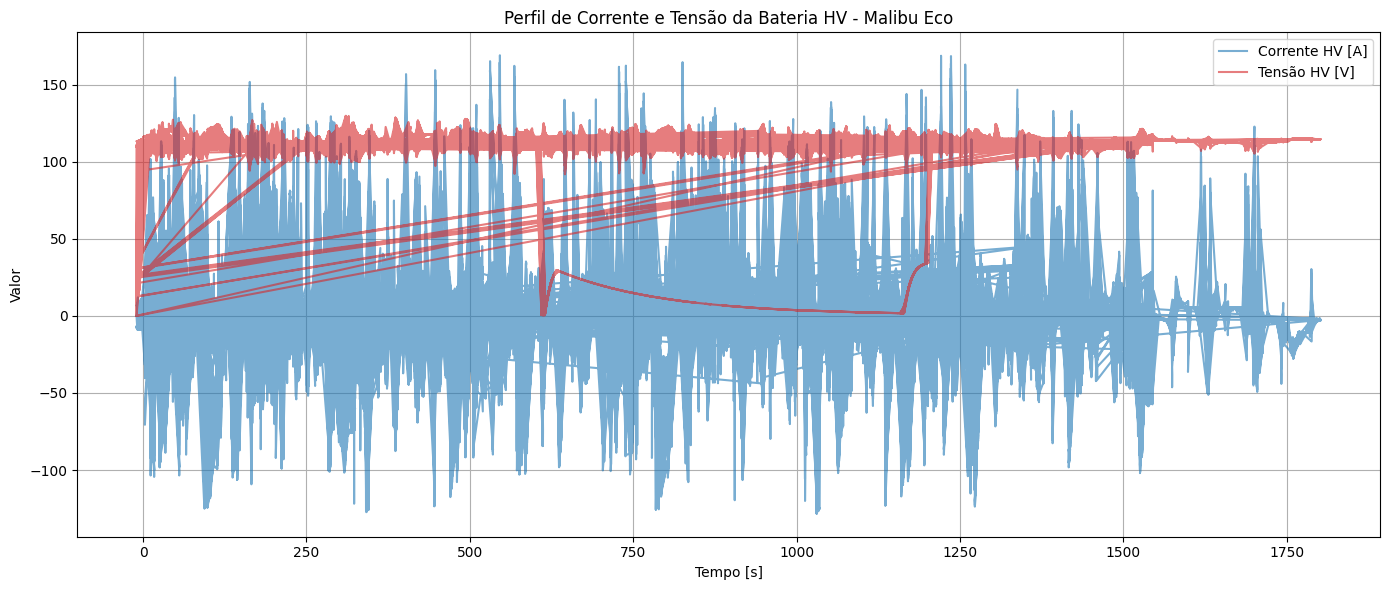

count    214505.000000
mean        711.037083
std         424.151777
min         -10.000000
25%         347.500000
50%         705.000000
75%        1062.500000
max        1802.000000
Name: Time[sec], dtype: float64


In [ ]:
# ============================================
# 📊 Selecionar apenas colunas de interesse
# ============================================
df_batt = df[["Time[sec]", "HV_Battery_Current[A]", "HV_Battery_Voltage[V]"]]

# ============================================
# 📈 Visualização do Perfil HV
# ============================================
plt.figure(figsize=(14, 6))
plt.plot(
    df_batt["Time[sec]"],
    df_batt["HV_Battery_Current[A]"],
    label="Corrente HV [A]",
    color="tab:blue",
    alpha=0.6
)
plt.plot(
    df_batt["Time[sec]"],
    df_batt["HV_Battery_Voltage[V]"],
    label="Tensão HV [V]",
    color="tab:red",
    alpha=0.6
)

plt.title("Perfil de Corrente e Tensão da Bateria HV - Malibu Eco")
plt.xlabel("Tempo [s]")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Estatísticas básicas do tempo
print(df["Time[sec]"].describe())


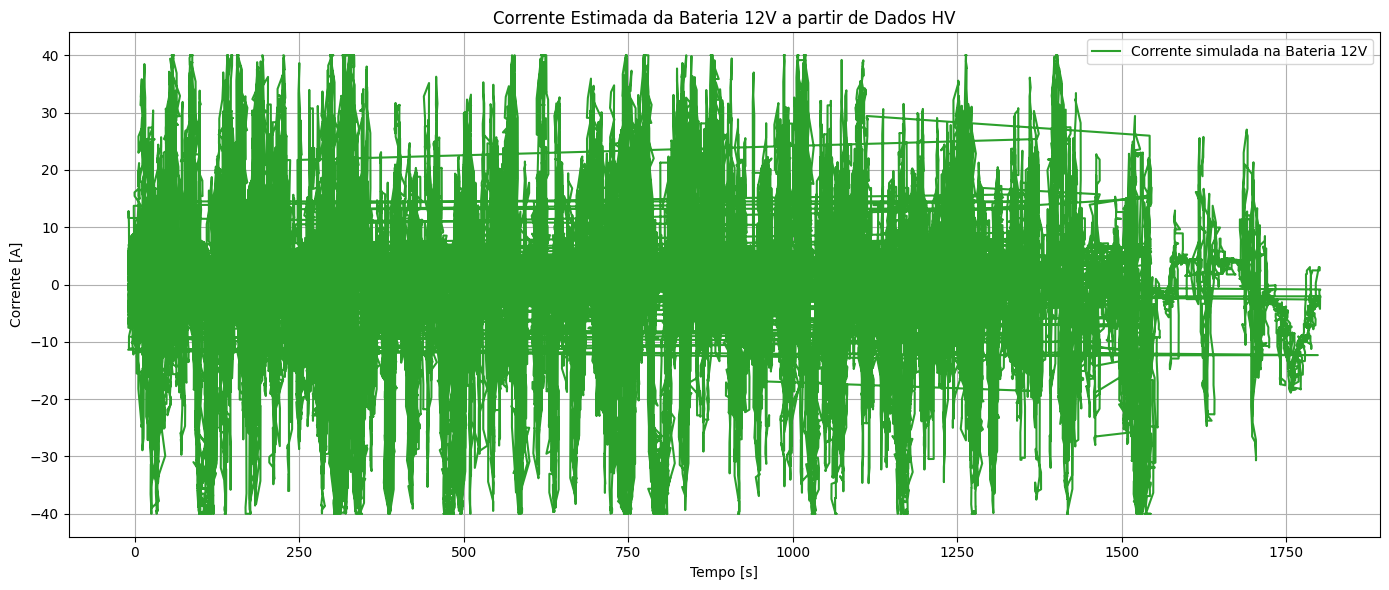

Arquivo salvo em: Corrente_Estimada_Bateria12V.csv


In [ ]:
# Parâmetros de conversão
efficiency_dcdc = 0.92          # Eficiência do conversor DC/DC
V_12V = 12.6                    # Tensão nominal da bateria 12V (em volts)
percentual_transferencia = 0.10 # Fração da potência HV transferida para 12V (~10%)

# Criar coluna de potência instantânea na bateria HV
df["HV_Power[W]"] = df["HV_Battery_Current[A]"] * df["HV_Battery_Voltage[V]"]

# Calcular corrente estimada para a 12V (considerando eficiência)
df["12V_Current[A]"] = (
    df["HV_Power[W]"] * percentual_transferencia * efficiency_dcdc / V_12V
)

# Limitar valores da corrente para um range realista
df["12V_Current[A]"] = df["12V_Current[A]"].clip(lower=-40, upper=40)

# Suavizar a curva com média móvel (para simular ripple filtrado)
df["12V_Current[A]"] = df["12V_Current[A]"].rolling(window=10, min_periods=1).mean()

# Plotar gráfico
plt.figure(figsize=(14, 6))
plt.plot(df["Time[sec]"], df["12V_Current[A]"], label="Corrente simulada na Bateria 12V", color='tab:green')
plt.title("Corrente Estimada da Bateria 12V a partir de Dados HV")
plt.xlabel("Tempo [s]")
plt.ylabel("Corrente [A]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Salvar CSV com os resultados
csv_path_12v = "Corrente_Estimada_Bateria12V.csv"
df[["Time[sec]", "12V_Current[A]"]].to_csv(csv_path_12v, index=False)

print(f"Arquivo salvo em: {csv_path_12v}")


In [ ]:
# Parâmetros do datasheet da bateria 12V
specs = {
    "Corrente de Carga Recomendada (1C)": 20,
    "Corrente de Descarga Contínua (2-3C)": (30, 45),
    "Corrente de Pico (10s)": 60,
    "Faixa Operacional de Tensão (LFP)": (10.0, 14.6),
    "Tensão Nominal": 12.8,
    "Capacidade Nominal (Ah)": 20
}

# Dicionário para guardar resultados
resultados = {}

# Corrente máxima de descarga (valor positivo)
resultados["Corrente Máxima (Descarga)"] = df["12V_Current[A]"].max()

# Corrente máxima de carga (valor negativo)
resultados["Corrente Mínima (Carga)"] = df["12V_Current[A]"].min()

# Corrente de pico observada em janela de 10 segundos (absoluto)
janela = 10  # segundos
sampling_rate = 1  # Hz (1 amostra/segundo — ajuste se sua amostragem for diferente)
corrente_absoluta = df["12V_Current[A]"].abs()
corrente_pico_10s = corrente_absoluta.rolling(window=janela).max().max()
resultados["Corrente de Pico (10s)"] = corrente_pico_10s

# Média das correntes positivas (descarga contínua)
media_descarga = df[df["12V_Current[A]"] > 0]["12V_Current[A]"].mean()
resultados["Corrente Média de Descarga"] = media_descarga

# Média das correntes negativas (carga contínua)
media_carga = df[df["12V_Current[A]"] < 0]["12V_Current[A]"].mean()
resultados["Corrente Média de Carga"] = media_carga

# Contagem de violações de limite de corrente contínua
violacoes_descarga = (df["12V_Current[A]"] > specs["Corrente de Descarga Contínua (2-3C)"][1]).sum()
violacoes_carga = (df["12V_Current[A]"] < -specs["Corrente de Carga Recomendada (1C)"]).sum()

resultados["# de Violações de Descarga >45A"] = violacoes_descarga
resultados["# de Violações de Carga >20A"] = violacoes_carga

# Criar DataFrame para exibir resultados
df_resultados = pd.DataFrame.from_dict(resultados, orient='index', columns=["Valor Simulado (A)"])
display(df_resultados)


Valor Simulado (A)
Corrente Máxima (Descarga)                40.000000
Corrente Mínima (Carga)                  -40.000000
Corrente de Pico (10s)                    40.000000
Corrente Média de Descarga                 5.665581
Corrente Média de Carga                   -9.091537
# de Violações de Descarga >45A            0.000000
# de Violações de Carga >20A           10666.000000

In [ ]:
df.groupby(["Test_id", "Phase_#"])["HV_Battery_Current[A]"].agg(["min", "max", "mean", "std"])


min      max      mean        std
Test_id  Phase_#                                       
61302058 0.0        0.080    0.080  0.080000        NaN
         1.0      -97.557  156.755 -1.560206  23.440407
         2.0      -71.724  153.727  0.871611  17.848294
61302059 0.0        0.087    0.087  0.087000        NaN
         1.0     -101.165  151.703 -1.626020  22.334828
         2.0      -70.538  158.341  0.600226  18.441421
61302060 0.0        0.087    0.087  0.087000        NaN
         1.0     -101.698  159.323 -1.712170  23.894919
         2.0      -69.240  161.508  0.799682  17.176269
61302061 0.0       -9.024   41.067  0.573785   5.545116
         1.0     -102.887  102.944 -1.300280  18.450385
         2.0     -102.542  132.874  0.177263  19.968542
61302062 0.0       -3.716    4.419  3.835154   1.569994
         1.0     -124.764  168.980 -4.602926  43.862437
         2.0     -126.503  137.731  0.432419  35.032348
         3.0     -125.840  168.667 -4.600218  44.680795
         4.0     -128.370  164.511  1.532434  35.239537
61302071 0.0       -1.161    2.295  0.044883   0.262857
         1.0      -92.199  128.379 -1.062389  20.310631
         2.0      -58.696  113.122  0.066142  12.312603
61302072 0.0        0.000    2.926  0.093009   0.351871
         1.0      -96.832  126.582 -0.521322  20.967279
         2.0      -58.683  125.647 -0.272035  12.399617
61302075 0.0       -3.440   11.993  1.700701   4.108756
         1.0     -103.545  131.845 -1.331084  22.827199
         2.0      -81.927  132.919  0.752749  22.364644
61302076 0.0       -5.805   11.320 -3.056893   3.304145
         1.0      -71.234  130.221 -0.445730  36.290113
         2.0      -63.448  134.456 -1.644028  31.684668
         3.0      -59.966  134.581  0.617568  34.037066
         4.0      -53.879  130.457 -0.231603  31.432477
61302078 0.0       -5.863   11.373  0.043732   0.568293
         1.0      -61.010  123.681 -0.584236  19.422955
         2.0      -58.688  124.177 -0.299798  19.516004
61302095 0.0        0.031    0.105  0.035973   0.006788
         1.0      -73.522   77.710 -3.675054  14.557356
         2.0      -64.038  146.691  0.359077  17.843555
61302096 0.0       -9.773    5.851 -0.451387   2.431299
         1.0      -94.697  143.171 -0.279802  19.719308
         2.0      -64.390  150.860  1.574581  15.882760
61302097 0.0       -8.078    4.229 -0.543261   2.287367
         1.0      -97.514  152.963 -1.793001  20.340593
         2.0      -64.035  154.034  0.659664  16.669691
61302099 0.0       -8.265    5.159  1.761470   4.147877
         1.0     -104.892  117.995 -1.113258  17.089690
         2.0     -106.506   87.946  0.121677  16.538708
61302100 0.0       -8.869    4.871  3.428111   3.894359
         1.0     -124.965  164.379 -2.934972  41.035086
         2.0     -127.345  134.558  0.633815  32.272595
         3.0     -125.516  163.572 -4.874959  40.864080
         4.0     -128.205  153.342  1.148068  29.037201

### Analise EDA pós briefing

In [ ]:
"""

 0   Test_id                    214505 non-null  int64  
 1   Time[sec]                  214505 non-null  float64
 2   Dyno_Speed[mph]            214505 non-null  float64
 3   Dyno_Tractive_Effort[N]    214505 non-null  float64
 4   Test_Cell_RH[%]            214505 non-null  float64
 5   Test_Cell_Temp[C]          214505 non-null  float64
 6   Phase_#                    214505 non-null  float64
 7   Engine_Oil_Temp[C]         214505 non-null  float64
 8   Engine_Coolant_Temp[C]     214505 non-null  float64
 9   Engine_Speed[rpm]          214505 non-null  float64
 10  HV_Battery_Current[A]      214505 non-null  float64
 11  HV_Battery_Voltage[V]      214505 non-null  float64
 12  Fuel_Flow_FuelScale[cc/s]  214505 non-null  float64

 """

'\n\n 0   Test_id                    214505 non-null  int64  \n 1   Time[sec]                  214505 non-null  float64\n 2   Dyno_Speed[mph]            214505 non-null  float64\n 3   Dyno_Tractive_Effort[N]    214505 non-null  float64\n 4   Test_Cell_RH[%]            214505 non-null  float64\n 5   Test_Cell_Temp[C]          214505 non-null  float64\n 6   Phase_#                    214505 non-null  float64\n 7   Engine_Oil_Temp[C]         214505 non-null  float64\n 8   Engine_Coolant_Temp[C]     214505 non-null  float64\n 9   Engine_Speed[rpm]          214505 non-null  float64\n 10  HV_Battery_Current[A]      214505 non-null  float64\n 11  HV_Battery_Voltage[V]      214505 non-null  float64\n 12  Fuel_Flow_FuelScale[cc/s]  214505 non-null  float64\n\n '

In [ ]:
## mph para km --> 

# Corrente, tensão, velocidade, temperatura

## QUal o comportamento da corrente, pico, min ...

## Phase X HV_battery 

## coolant X speed x Temp

## comportamento do carro

## Testar temp cell X temp coolant

## juntar testes por protocolo 

## entender melhor os protocos 

#### Criação/Tranfomação de Colunas

In [ ]:
# Analisar o comportamento da corrente (pico, min)
print("Estatísticas da Corrente da Bateria (HV_Battery_Current[A]):")
print(df['HV_Battery_Current[A]'].describe())

Estatísticas da Corrente da Bateria (HV_Battery_Current[A]):
count    214505.000000
mean         -0.347955
std          22.109268
min        -128.370000
25%          -5.491000
50%           4.094000
75%           4.890000
max         168.980000
Name: HV_Battery_Current[A], dtype: float64


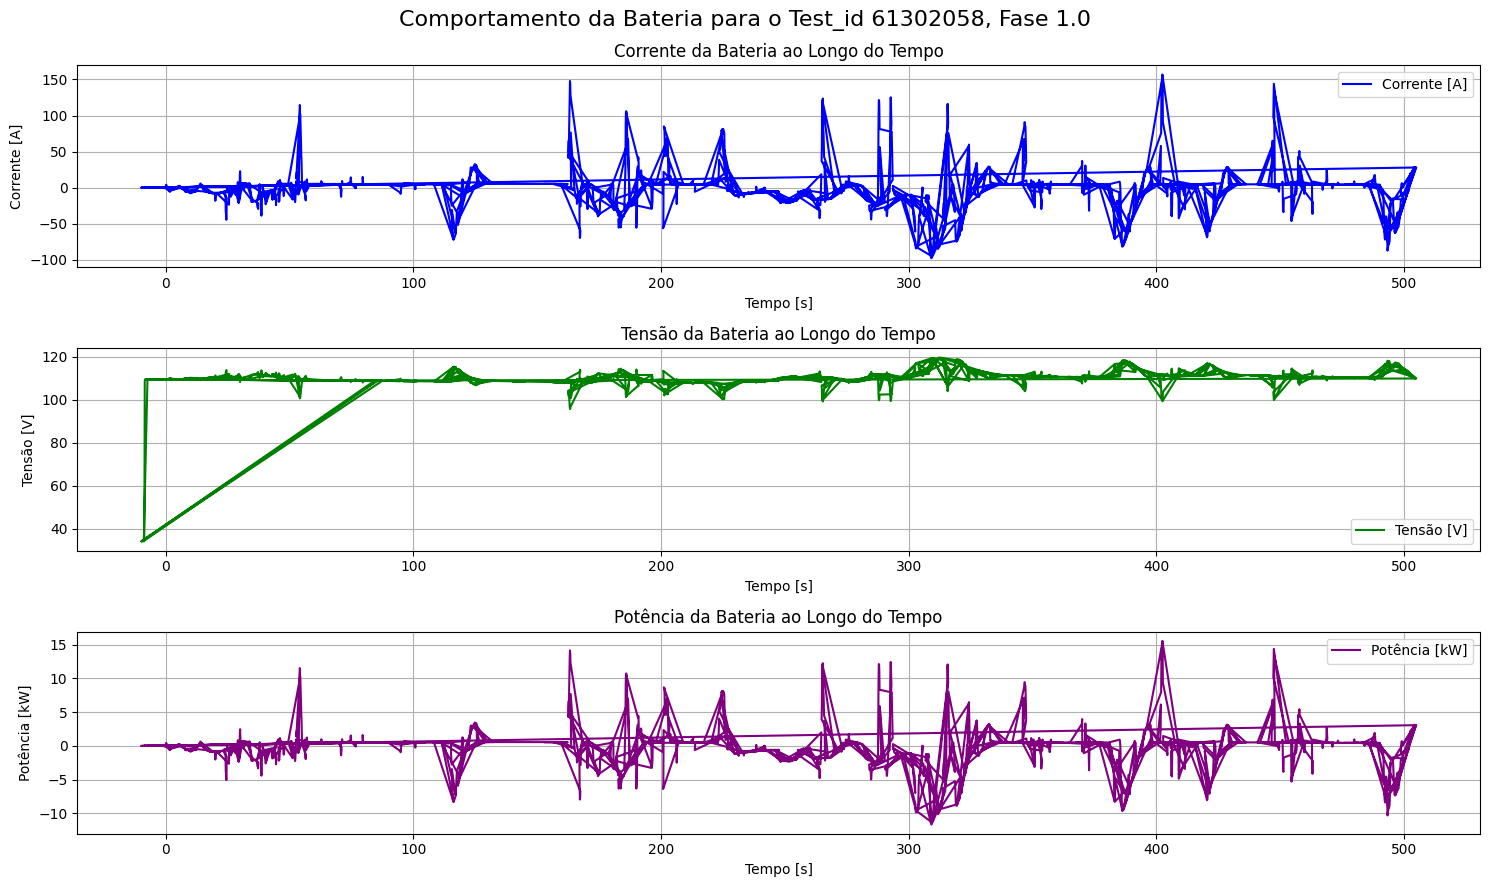

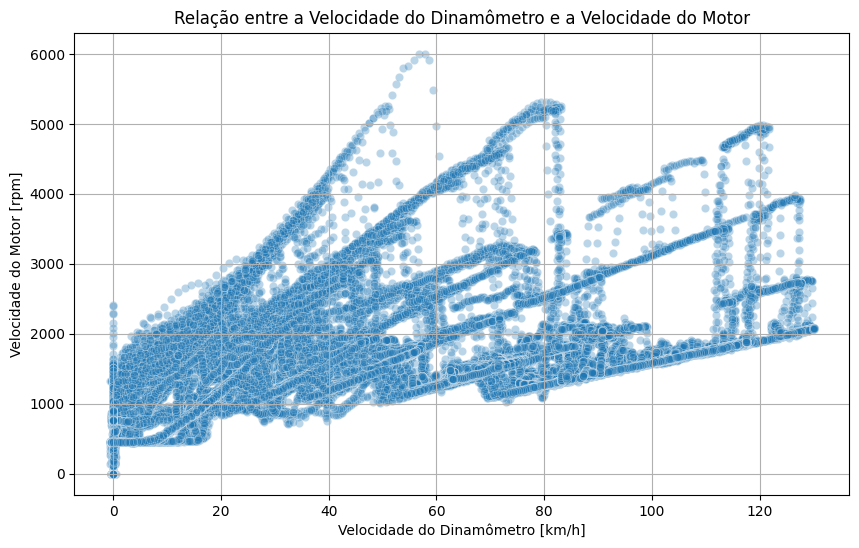

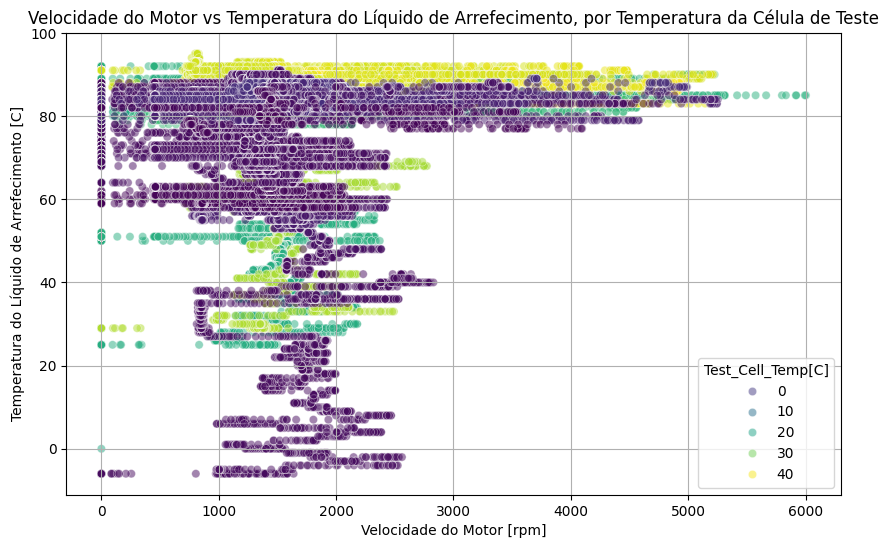

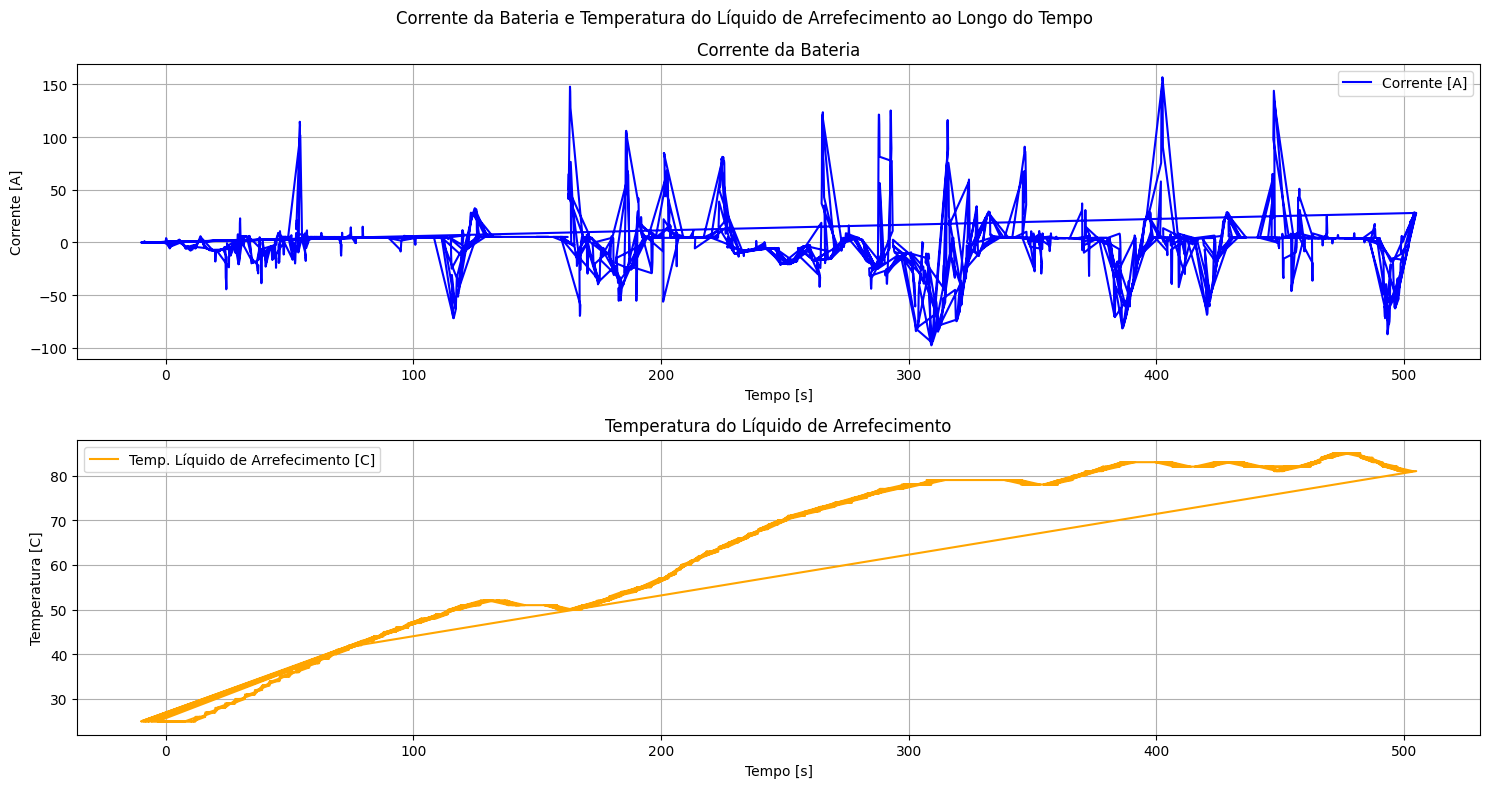

In [ ]:
# Escolher um Test_id e Phase específicos para a visualização detalhada
# Este exemplo usa os primeiros valores únicos encontrados no DataFrame
test_id_to_plot = df['Test_id'].iloc[0]
phase_to_plot = df['Phase_#'].iloc[0]

# Filtrar o DataFrame para o Test_id e Phase selecionados
df_plot = df[(df['Test_id'] == test_id_to_plot) & (df['Phase_#'] == phase_to_plot)]

# Gráfico 1: Comportamento da bateria (Corrente, Tensão, Potência)
plt.figure(figsize=(15, 9))
plt.suptitle(f"Comportamento da Bateria para o Test_id {test_id_to_plot}, Fase {phase_to_plot}", fontsize=16)

plt.subplot(3, 1, 1)
plt.plot(df_plot['Time[sec]'], df_plot['HV_Battery_Current[A]'], label='Corrente [A]', color='blue')
plt.title('Corrente da Bateria ao Longo do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Corrente [A]')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_plot['Time[sec]'], df_plot['HV_Battery_Voltage[V]'], label='Tensão [V]', color='green')
plt.title('Tensão da Bateria ao Longo do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_plot['Time[sec]'], df_plot['Potencia_Bateria_kW'], label='Potência [kW]', color='purple')
plt.title('Potência da Bateria ao Longo do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Potência [kW]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico 2: Relação entre a Velocidade do Dinamômetro e a Velocidade do Motor
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dyno_Speed_kmh', y='Engine_Speed[rpm]', data=df, alpha=0.3)
plt.title('Relação entre a Velocidade do Dinamômetro e a Velocidade do Motor')
plt.xlabel('Velocidade do Dinamômetro [km/h]')
plt.ylabel('Velocidade do Motor [rpm]')
plt.grid(True)
plt.show()

# Gráfico 3: Velocidade do Motor vs Temperatura do Líquido de Arrefecimento
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine_Speed[rpm]', y='Engine_Coolant_Temp[C]', hue='Test_Cell_Temp[C]', data=df, alpha=0.5, palette='viridis')
plt.title('Velocidade do Motor vs Temperatura do Líquido de Arrefecimento, por Temperatura da Célula de Teste')
plt.xlabel('Velocidade do Motor [rpm]')
plt.ylabel('Temperatura do Líquido de Arrefecimento [C]')
plt.grid(True)
plt.show()

# Gráfico 4: Corrente da Bateria e Temperatura do Líquido de Arrefecimento
plt.figure(figsize=(15, 8))
plt.suptitle('Corrente da Bateria e Temperatura do Líquido de Arrefecimento ao Longo do Tempo')

plt.subplot(2, 1, 1)
plt.plot(df_plot['Time[sec]'], df_plot['HV_Battery_Current[A]'], label='Corrente [A]', color='blue')
plt.title('Corrente da Bateria')
plt.xlabel('Tempo [s]')
plt.ylabel('Corrente [A]')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_plot['Time[sec]'], df_plot['Engine_Coolant_Temp[C]'], label='Temp. Líquido de Arrefecimento [C]', color='orange')
plt.title('Temperatura do Líquido de Arrefecimento')
plt.xlabel('Tempo [s]')
plt.ylabel('Temperatura [C]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

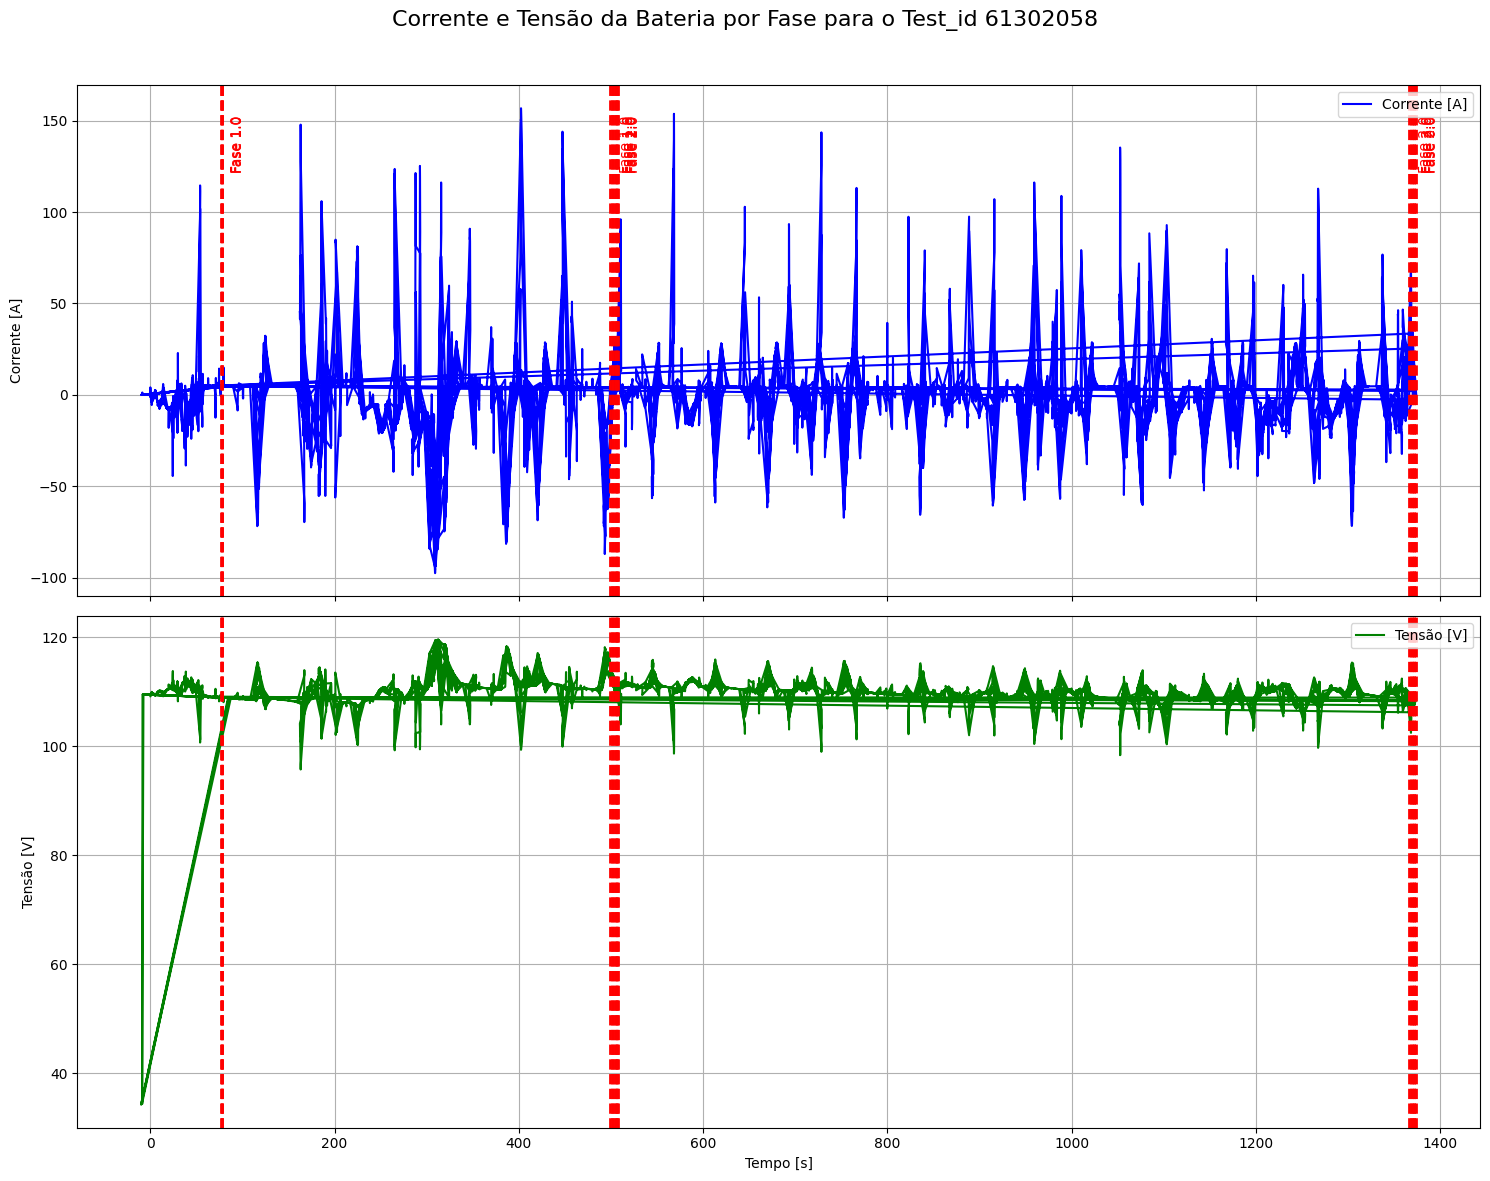

In [ ]:
# Escolher um Test_id para focar a análise
test_id_to_plot = df['Test_id'].iloc[0]
df_filtered = df[df['Test_id'] == test_id_to_plot].copy()

# Encontrar os pontos de tempo onde a fase muda
phase_changes = df_filtered[df_filtered['Phase_#'].diff() != 0]['Time[sec]'].tolist()
phase_labels = df_filtered[df_filtered['Phase_#'].diff() != 0]['Phase_#'].tolist()

# Criar o gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
fig.suptitle(f"Corrente e Tensão da Bateria por Fase para o Test_id {test_id_to_plot}", fontsize=16)

# Plotar a Corrente no primeiro sub-gráfico
ax1.plot(df_filtered['Time[sec]'], df_filtered['HV_Battery_Current[A]'], label='Corrente [A]', color='blue')
ax1.set_ylabel('Corrente [A]')
ax1.grid(True)
ax1.legend(loc='upper right')

# Plotar a Tensão no segundo sub-gráfico
ax2.plot(df_filtered['Time[sec]'], df_filtered['HV_Battery_Voltage[V]'], label='Tensão [V]', color='green')
ax2.set_xlabel('Tempo [s]')
ax2.set_ylabel('Tensão [V]')
ax2.grid(True)
ax2.legend(loc='upper right')

# Adicionar linhas verticais para indicar as mudanças de fase
for i, time_point in enumerate(phase_changes):
    ax1.axvline(x=time_point, color='red', linestyle='--', linewidth=2)
    ax2.axvline(x=time_point, color='red', linestyle='--', linewidth=2)
    if i < len(phase_labels):
        ax1.text(time_point + 10, ax1.get_ylim()[1] * 0.9, f'Fase {phase_labels[i]}', rotation=90, va='top', ha='left', color='red', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('corrente_tensao_fase.png')
plt.show()